In [0]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

# **Telechargement du dataset**

In [0]:
!wget https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv


In [0]:
#Lecture du dataset
red = pd.read_csv("/content/winequality-red.csv", sep=';')

# **Exploration des donnees**

In [0]:
#Affichage des 5 premieres ligne du dataset
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [0]:
#Taille du dataset

print("La taille du dataset est : ", red.shape)
nb_instances , nb_attributs = red.shape

print("Le nombre d'instances : ", nb_instances)

print("Le nombre d'attributs : ", nb_attributs)


La taille du dataset est :  (1599, 12)
Le nombre d'instances :  1599
Le nombre d'attributs :  12


## Information statistiques sur le dataset

In [0]:
red.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


## Information statistiques sur l'attributs "quality"

In [0]:
#Affichage en texte
red.quality.value_counts()  

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

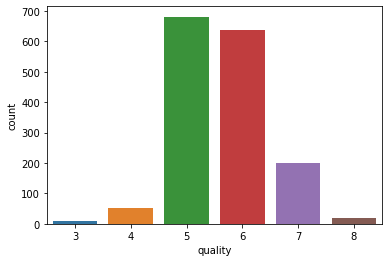

In [0]:
#Affichage graphique
sns.countplot(x='quality', data=red) 

# Labelisation du dataset

In [0]:
#Condition d'evaluation du vin selon sa qualite
conditions = [    (red['quality'] > 5),    (red['quality'] <= 5) ] 
rating = ['good', 'bad']

#Ajout d'une colonne rating qui contiendra le label de chaque instance
red['rating'] = np.select(conditions, rating)

#affichage en texte
red.rating.value_counts() 

good    855
bad     744
Name: rating, dtype: int64

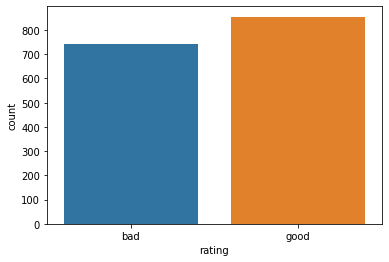

In [0]:
# affichage graphique
sns.countplot(x='rating', data=red) 

## Matrice de covariance

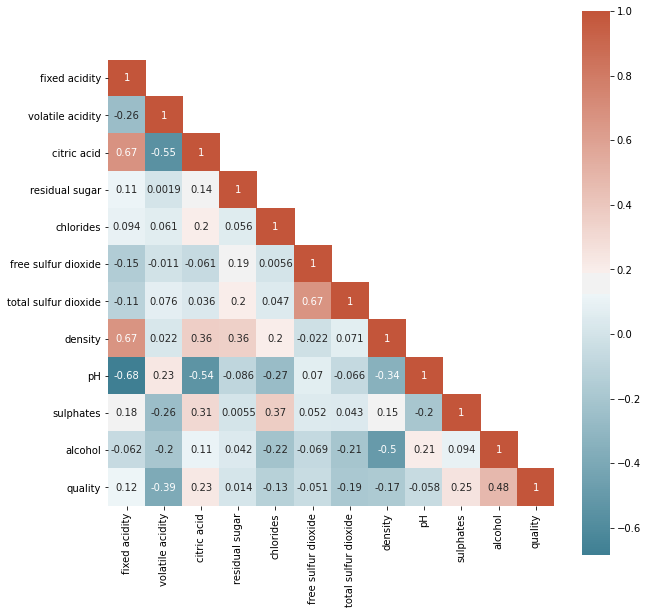

In [0]:
correlation= red.corr()
mask = np.array(correlation)
mask[np.tril_indices_from(mask)] = False
fig=plt.pyplot.gcf()
fig.set_size_inches(10,10)
sns.heatmap(data=correlation,mask=mask,square=True,annot=True,cbar=True,cmap=sns.diverging_palette(220, 20, as_cmap=True))

In [0]:
#Tri des correlation dans l'ordre decroissant

#Affichage en texte
correlation['quality'].abs().sort_values(ascending=False) 

quality                 1.000000
alcohol                 0.476166
volatile acidity        0.390558
sulphates               0.251397
citric acid             0.226373
total sulfur dioxide    0.185100
density                 0.174919
chlorides               0.128907
fixed acidity           0.124052
pH                      0.057731
free sulfur dioxide     0.050656
residual sugar          0.013732
Name: quality, dtype: float64

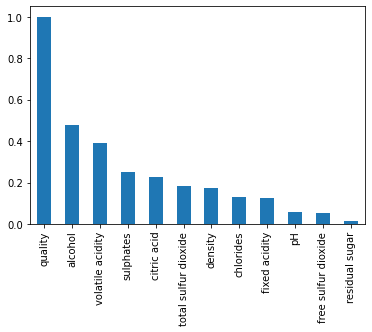

In [0]:
#Affichage graphique
correlation['quality'].abs().sort_values(ascending=False).plot(kind='bar') 

# **Nettoyage des donnees**

In [0]:
#Affichage des valeurs manuqantes par attributs
print(red.isna().sum())

#Il n'y a pas de valeurs manquantes dans ce dataset donc on n'a pas besoin de faire un remplissage des valeurs manquantes.


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
rating                  0
dtype: int64


# **Modelisation**

In [0]:
# nous allons representer good par 1 et bad par 0

def label_dataset(x):
    if x == "good":
        return 1
    else :
        return 0

red['label'] = red['rating'].apply(label_dataset)
red.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,rating,label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,bad,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,bad,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,good,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,bad,0


In [0]:
#Creation du X 
X = red.drop(['quality', 'rating', 'label'], axis=1)
X.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4


In [0]:
#Creation du Y 
y = red['label']
y.head()

0    0
1    0
2    0
3    1
4    0
Name: label, dtype: int64

## Classification et regression

In [0]:
X_train,X_test,y_train,y_test=train_test_split(X, y, test_size=0.2, random_state=42)

Acc_list = [ ]

classifiers=[LogisticRegression(max_iter=2000),KNeighborsClassifier(),
             RandomForestClassifier(random_state=42),DecisionTreeClassifier(random_state=42),]
classifiers_names=['LogisticRegression','KNeighborsClassifier','RandomForestClassifier','DecisionTreeClassifier']

result={}

for i  in range(len(classifiers)):
    c=classifiers[i]
    c.fit(X_train,y_train)
    y_predict=c.predict(X_test)
    Acc_list.append(accuracy_score(y_predict,y_test))
     
result={'Algorithme de classification':classifiers_names,'Accuracy':Acc_list}

acc_frame=pd.DataFrame(result)

#Affichage en texte
acc_frame 

,Algorithme de classification,Accuracy
0,LogisticRegression,0.737500
1,KNeighborsClassifier,0.612500
2,RandomForestClassifier,0.790625
3,DecisionTreeClassifier,0.731250


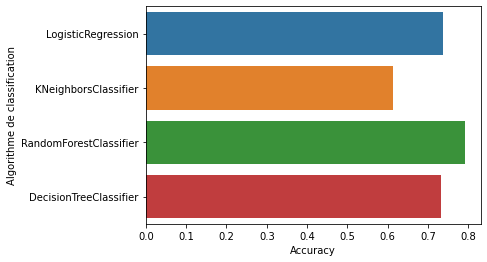

In [0]:
#Affichage graphique
sns.barplot(y='Algorithme de classification',x='Accuracy',data=acc_frame)

## Clustering

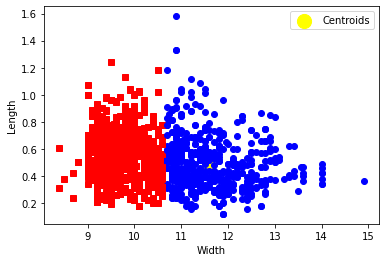

In [0]:
from sklearn.cluster import KMeans

#Le choix de ces deux attributs est fait selon les correlations obtenues.
x1 = np.array(red['alcohol'])
x2 = np.array(red['volatile acidity'])

X = np.array(list(zip(x1, x2)))
colors = ['b', 'r']
markers = ['o', 's']
plt.pyplot.ylabel('Length')

kmeans = KMeans(n_clusters=2).fit(X)
plt.pyplot.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 200, c = 'yellow', label = 'Centroids')

for i, l in enumerate(kmeans.labels_):
    plt.pyplot.plot(x1[i], x2[i], color=colors[l], marker=markers[l])
    
plt.pyplot.xlabel('Width')
plt.pyplot.legend()
plt.pyplot.show()